# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from matplotlib.pyplot import figure, show


Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

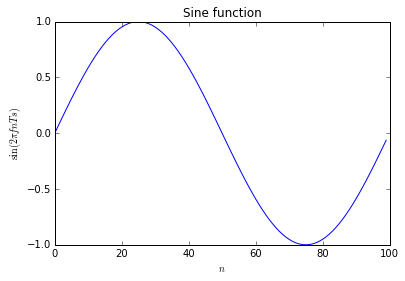

In [33]:
from numpy import arange, sin, pi
def sin_fn():
    #if ((n < a) | (a < 0) | n > N-a):
     #   raise ValueError('n should be inferior to N-1 or a is equal to zero')
# N - no. of samples
# f - signal frequency
# Fs - sampling frequency
# p - no. of period
    x = np.arange(0, 1, 0.01)
    
    s = np.sin(2*pi*x)
    return s
plt.plot(sin_fn())
plt.xlabel(r'$n$')
plt.ylabel(r'$\sin(2\pi f n Ts)$')
plt.title('Sine function')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

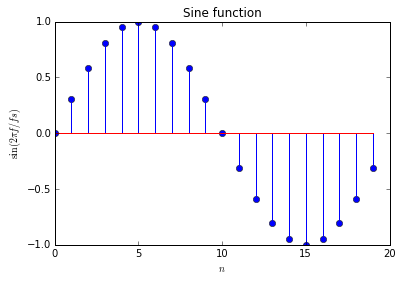

In [34]:
def sin_fn(f = 1, Fs = 20,p = 4):
    #if ((n < a) | (a < 0) | n > N-a):
     #   raise ValueError('n should be inferior to N-1 or a is equal to zero')
# N - no. of samples
# f - signal frequency
# Fs - sampling frequency
# p - no. of period
    x = np.arange(0, 1./f * p, 1./Fs)
    
    s = np.sin(2*pi*f*x)
    return s
plt.stem(sin_fn(1,20,1))
plt.xlabel(r'$n$')
plt.ylabel(r'$\sin(2\pi f /fs)$')
plt.title('Sine function')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

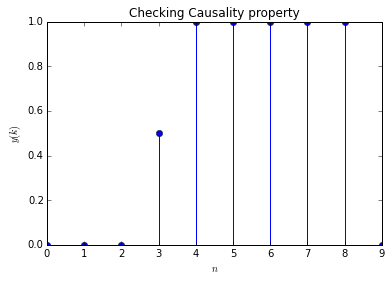

In [40]:
def step(n=0, N=10):
    if n> N-1:
        raise ValueError('n should be inferior to N-1')
        
        
    u = np.zeros((N,))
    
    u[n : N] =1
    
    return u
N = 10
s = step(4,10)
y = np.zeros((N,))

for i in range(0,N-1):
    y[i] = (s[i]+s[i+1])/2

plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$y(k)$')
plt.title('Checking Causality property')

**1.2** Propose a modification to obtain a causal version

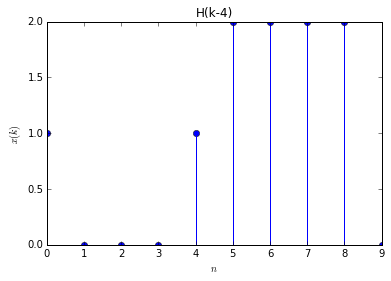

In [36]:
N = 10
s = step(4,10)
y = np.zeros((N,))

for i in range(0,N-1):
    y[i] = (s[i]+s[i-1])

plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$x(k)$')
plt.title('H(k-4)')   

Comments on your observations

Causal systems depend on past and present inputs not on future inputs.

# Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



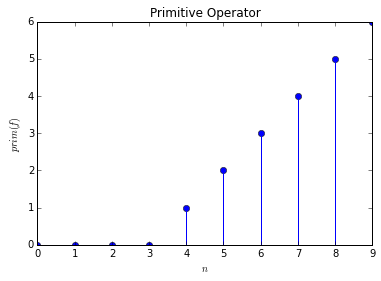

In [41]:
def prim(f):
    F = np.zeros((N,))
    F[0] = f[0];
    for i in range(1,N):
        F[i] = F[i-1] + f[i]
    return F 

N = 10
s = step(4,10)
a = prim(s)
plt.stem(a)
plt.xlabel(r'$n$')
plt.ylabel(r'$prim(f)$')
plt.title('Primitive Operator')

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

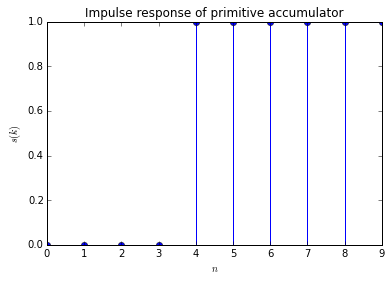

In [43]:
def dirac(n=0, N=20):
    if n> N-1:
        raise ValueError('n should be inferior to N-1')
        
        
    s = np.zeros((N,))
    s[n] = 1
    
    return s

i = dirac(4,20)
a = prim(i)
plt.stem(a)
plt.xlabel(r'$n$')
plt.ylabel(r'$s(k)$')
plt.title('Impulse response of primitive accumulator')

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

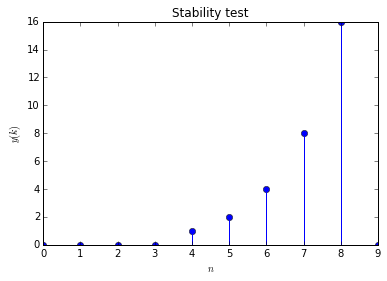

In [44]:
N = 10
s = dirac(4,10)
y = np.zeros((N,))

for i in range(0,N-1):
    y[i] = (s[i]+2*y[i-1])
plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$y(k)$')
plt.title('Stability test and Impulse Response')

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

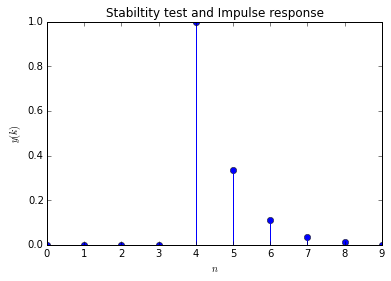

In [45]:
N = 10
s = dirac(4,10)
y = np.zeros((N,))

for i in range(0,N-1):
    y[i] = (s[i]+(y[i-1]/3))
plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$y(k)$')
plt.title('Stabiltity test and Impulse response')

Comments your observations

Unstable system for y[k] = x[k]+2*y[k-1] and Stable system for y[k] = x[k]+y[k-1]/3

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


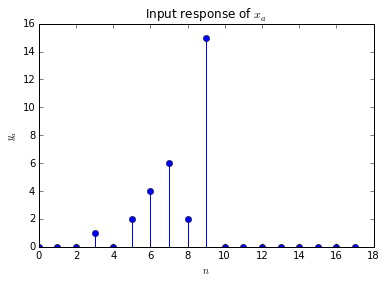

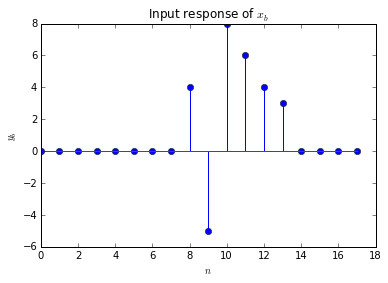

In [48]:
x_a = np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0,0])
x_b = np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0,0])
y_a = np.array(np.zeros(18,))
y_b = np.array(np.zeros(18,))
plt.figure()
for i in range(1,18):
    y_a[i]= 3*x_a[i-1]-2*x_a[i]+x_a[i+1]    
plt.stem(y_a)
plt.xlabel('$n$')
plt.ylabel('$y_a$')
plt.title('Input response of $x_a$')
plt.figure()
for i in range(1,18):
    y_b[i]= 3*x_b[i-1]-2*x_b[i]+x_b[i+1]    
plt.stem(y_b)
plt.xlabel('$n$')
plt.ylabel('$y_b$')
plt.title('Input response of $x_b$')

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


Hence Linear
hence Time Invariant too


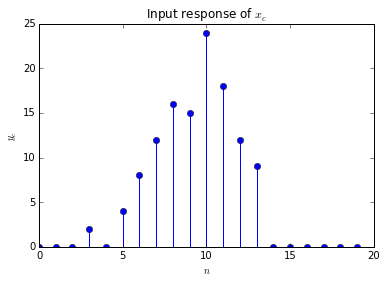

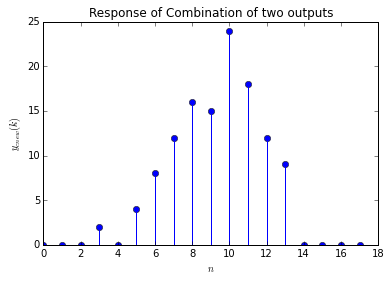

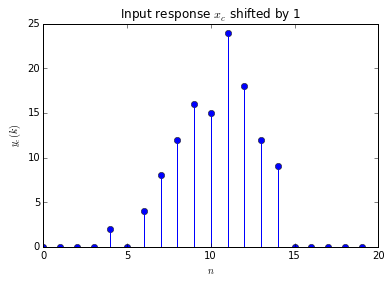

In [62]:
x_c = np.array(np.zeros(20,))
y_c = np.array(np.zeros(20,))
y_cnew = np.array(np.zeros(18,))
for i in range(1,20):
    x_c[i] = 2*x_a[i]+3*x_b[i]
#here 2 and 3 are just the scaling factors    
for i in range(1,18):
    y_c[i] = 3*x_c[i-1] - 2*x_c[i] + x_c[i+1]
    
plt.stem(y_c)
plt.xlabel('$n$')
plt.ylabel('$y_c$')
plt.title('Input response of $x_c$') # xc = alpha * x_a + beta * x_b ......here alpha = 2 and beta =3
plt.figure()
for i in range(1,18):
    y_cnew[i] = 2*y_a[i] + 3*y_b[i]
plt.stem(y_cnew)    
plt.xlabel(r'$n$')
plt.ylabel(r'$y_{cnew}(k)$') # yc = alpha * y_a + beta * y_b..........here alpha = 2 and beta =3
plt.title('Response of Combination of two outputs')
print "Hence Linear"
plt.figure()
for i in range(1,18):
    y_c[i] = 3*x_c[i-2] - 2*x_c[i-1] + x_c[i]
plt.stem(y_c)   
plt.xlabel(r'$n$')
plt.ylabel(r'$y_c(k)$')
plt.title('Input response $x_c$ shifted by 1')
print "hence Time Invariant too"
#x_c = step(0,18)
#for i in range(1,18):
#    y_c[i] = 3*x_c[i-2] - 2*x_c[i-1] + x_c[i]

#plt.figure()
#plt.stem(y_c)

**3.3** Propose a nonlinear/noninvariant system.

Hence Non -Linear
hence Time Invariant too


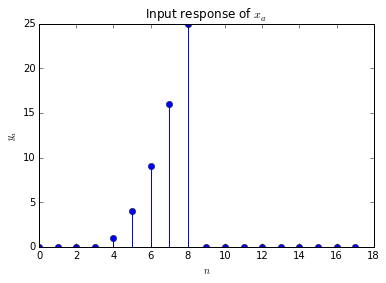

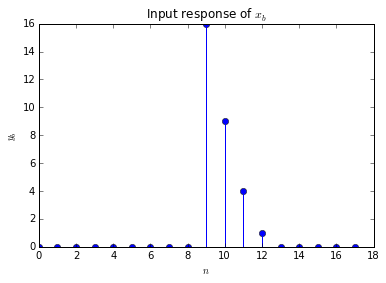

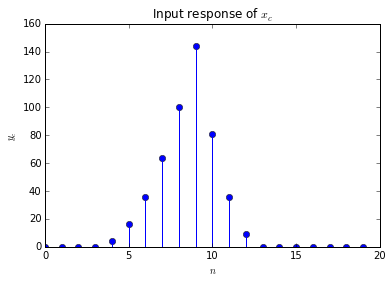

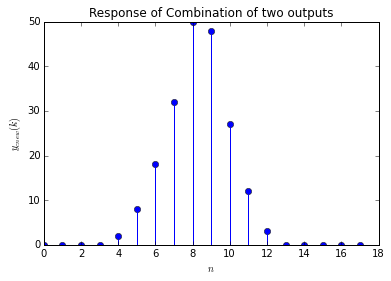

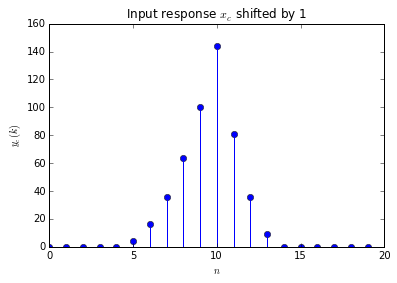

In [66]:
y_new = np.array(np.zeros(18,))
for i in range(1,18):
    y_a[i]= x_a[i]**2    
plt.stem(y_a)
plt.xlabel('$n$')
plt.ylabel('$y_a$')
plt.title('Input response of $x_a$')
plt.figure()
for i in range(1,18):
    y_b[i]= x_b[i]**2    
plt.stem(y_b)
plt.xlabel('$n$')
plt.ylabel('$y_b$')
plt.title('Input response of $x_b$')
plt.figure()
for i in range(1,20):
    x_c[i] = 2*x_a[i]+3*x_b[i]
#here 2 and 3 are just the scaling factors    
for i in range(1,18):
    y_c[i] = x_c[i]**2
    
plt.stem(y_c)
plt.xlabel('$n$')
plt.ylabel('$y_c$')
plt.title('Input response of $x_c$') # xc = alpha * x_a + beta * x_b ......here alpha = 2 and beta =3
plt.figure()
for i in range(1,18):
    y_cnew[i] = 2*y_a[i] + 3*y_b[i]
plt.stem(y_cnew)    
plt.xlabel(r'$n$')
plt.ylabel(r'$y_{cnew}(k)$') # yc = alpha * y_a + beta * y_b..........here alpha = 2 and beta =3
plt.title('Response of Combination of two outputs')
print "Hence Non -Linear"
plt.figure()
for i in range(1,18):
    y_c[i] = x_c[i-1]**2
plt.stem(y_c)   
plt.xlabel(r'$n$')
plt.ylabel(r'$y_c(k)$')
plt.title('Input response $x_c$ shifted by 1')
print "hence Time Invariant too"